In [101]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("KNMI_20190217_hourly.txt",header=0)
data = data.dropna(axis=0,how= 'any')
data.columns = data.columns.str.strip() # removes the spaces in the column names

data_temp = data["T"]
df_zscore = (data_temp - data_temp.mean())/data_temp.std() # z score normalisation


random.seed()
gallons =[]
for temp in data_temp:
    y = random.gauss(df_zscore.mean(),df_zscore.std())
    if (y<0):
        y *= -1
    gallons.append(y)

new_dataset = pd.concat([data.reset_index(drop=True), pd.DataFrame(gallons, columns=["Gallons"]).reset_index(drop=True)], axis=1, sort=False)
new_dataset.to_csv("New dataset.csv")

In [102]:

new_dataset.head()


# STN    YYYYMMDD   HH     DD     FH     FF     FX     T    T10    TD  \
0    240  20180101.0  1.0  210.0  130.0  130.0  190.0  80.0         46.0   
1    240  20180101.0  2.0  230.0  120.0  130.0  190.0  79.0         54.0   
2    240  20180101.0  3.0  260.0  130.0  140.0  200.0  78.0         42.0   
3    240  20180101.0  4.0  250.0  110.0  100.0  180.0  77.0         41.0   
4    240  20180101.0  5.0  250.0  110.0  120.0  160.0  73.0         32.0   

     ...       N     U     WW   IX    M    R    S    O    Y   Gallons  
0    ...     8.0  79.0     51  7.0  0.0  1.0  0.0  0.0  0.0  1.138979  
1    ...     8.0  84.0     81  7.0  0.0  1.0  0.0  0.0  0.0  1.993060  
2    ...     8.0  78.0     23  7.0  0.0  1.0  0.0  0.0  0.0  1.167435  
3    ...     8.0  77.0     23  7.0  0.0  1.0  0.0  0.0  0.0  0.089596  
4    ...     5.0  75.0         5.0  0.0  0.0  0.0  0.0  0.0  0.371970  

[5 rows x 26 columns]

In [74]:
data = pd.read_csv("KNMI_20190217_hourly.txt",header=0)
data = data.dropna(axis=0,how= 'any')
data.columns = data.columns.str.strip()
len(data)

2304

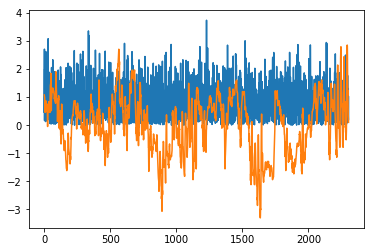

In [28]:
plt.plot(range(len(gallons)),gallons)
plt.plot(range(len(df_zscore)),df_zscore)

In [24]:
range(len(gallons))

range(0, 2305)

In [87]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object